In [ ]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec



In [ ]:
# Load the dataset from the csv file using pandas
# best way is to mount the drive on colab and
# copy the path for the csv file
data = pd.read_csv("creditcard.csv")


In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77333,57003,-1.565835,0.537575,3.284121,3.229021,-0.917761,2.016339,-1.157749,1.086392,0.234172,...,0.125678,1.072830,-0.229837,0.094444,0.215087,0.544487,0.271867,-0.089124,25.69,0.0
77334,57005,-0.710264,-0.095320,2.899716,0.718612,-0.501955,0.968641,-0.007123,0.308006,1.383339,...,0.069589,0.711129,-0.038570,0.088990,-0.282553,-0.448201,0.054450,-0.051693,65.00,0.0
77335,57005,0.875729,-0.658494,-0.798643,-0.889801,-0.205406,-1.093946,0.743501,-0.381269,0.405087,...,0.192299,0.161282,-0.451218,0.060376,0.885705,-0.477421,-0.036297,0.035704,235.53,0.0
77336,57006,-0.679923,1.074176,1.045563,1.100620,-0.764069,-1.048969,0.601586,0.283135,-0.674820,...,0.256539,0.475028,0.124473,0.886947,-0.327076,-0.362904,0.017048,0.109040,73.52,0.0


In [ ]:
# Print the shape of the data
# data = data.sample(frac = 0.1, random_state = 48)
print(data.shape)
print(data.describe())


(77338, 31)
               Time            V1            V2            V3            V4  \
count  77338.000000  77338.000000  77338.000000  77338.000000  77338.000000   
mean   36633.048243     -0.254918     -0.031977      0.678014      0.164544   
std    14986.790777      1.883504      1.670498      1.395670      1.369866   
min        0.000000    -56.407510    -72.715728    -33.680984     -5.172595   
25%    30195.250000     -1.016589     -0.597243      0.187865     -0.726170   
50%    39488.000000     -0.248318      0.070092      0.765732      0.183869   
75%    48186.000000      1.153837      0.723977      1.396222      1.046651   
max    57006.000000      1.960497     18.902453      4.226108     16.715537   

                 V5            V6            V7            V8            V9  \
count  77338.000000  77338.000000  77338.000000  77338.000000  77338.000000   
mean      -0.275915      0.096378     -0.114258      0.054293     -0.002388   
std        1.384600      1.304456      

In [ ]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


0.002436842992132108
Fraud Cases: 188
Valid Transactions: 77149


In [ ]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,188.000000
mean,94.292500
std,214.093799
min,0.000000
25%,1.000000
50%,7.550000
75%,99.990000
max,1809.680000


In [ ]:
print("details of valid transaction")
valid.Amount.describe()


details of valid transaction


,Amount
count,77149.000000
mean,97.625867
std,270.623024
min,0.000000
25%,7.690000
50%,26.800000
75%,89.000000
max,19656.530000


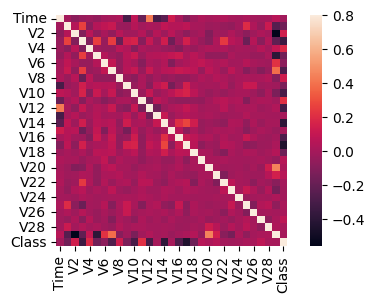

In [ ]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (6, 3))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


In [ ]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values


(77338, 30)
(77338,)


In [26]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)


In [27]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain,yTrain)
# predictions
yPred = rfc.predict(xTest)


In [29]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


The model used is Random Forest classifier
The accuracy is 0.9992242048099301
The precision is 0.9666666666666667
The recall is 0.725
The F1-Score is 0.8285714285714286
The Matthews correlation coefficient is0.8368118907000021


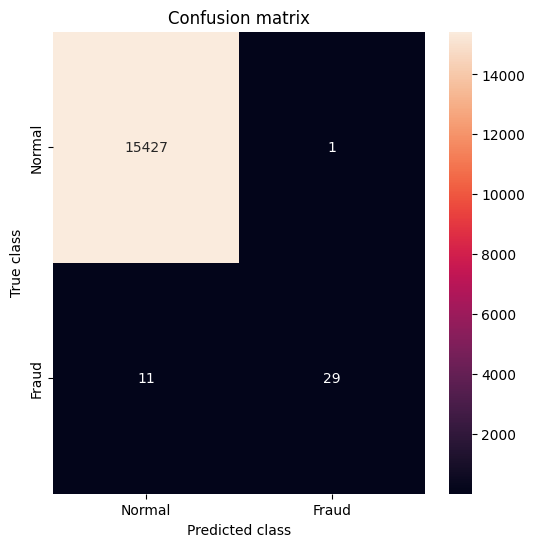

In [32]:

# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


In [33]:
n_outliers

188